In [1]:
import anndata
import numpy as np
import sys
import torch
sys.path.append('../../../../')
import velovae as vv
%load_ext autoreload
%autoreload 2

In [2]:
dataset = 'Neuron_scNT'
root = '/scratch/blaauw_root/blaauw1/gyichen'
adata = anndata.read_h5ad(f'{root}/data/{dataset}_pp.h5ad')
# adata = anndata.read_h5ad("/nfs/turbo/umms-welchjd/yichen/data/scRNA/utv_datasets/neuron_splicing_lite.h5ad")
adata.obs['clusters'] = adata.obs['time'].astype(str)

In [ ]:
#genes_retain = ['Jun','Fos','Srf','Maff','Bhlhe40','Fosb','Egr4','Egr1','Egr2','Mef2d',\
#                'Cebpb','Rfx3','Hspa5','Pou3f1','Rfxap','Klf9','Cebpg','Klf16']
#vv.preprocess(adata, n_gene=2000, gene_retain=genes_retain, min_shared_counts=20)
#adata.write_h5ad(f'{root}/data/{dataset}_pp_2.h5ad')

In [3]:
model_path_base = f'{root}/checkpoints/{dataset}'
figure_path_base = f'{root}/figures/{dataset}'
data_path = f'{root}/data/velovae/continuous/{dataset}'
gene_plot = ['Fosb','Rfx3','Cebpg','Homer1']

# Informative Time Prior

In [4]:
adata.obs['tprior'] = adata.obs['time'].to_numpy().astype(float)

# VeloVAE

In [5]:
figure_path = f'{figure_path_base}/VeloVAE'
model_path = f'{model_path_base}/VeloVAE'

torch.manual_seed(2022)
np.random.seed(2022)
vae = vv.VAE(adata, 
             tmax=20, 
             dim_z=5, 
             device='cuda:0',
             init_method='tprior',
             init_key='tprior',
             tprior='tprior',
             init_ton_zero=False)

vae.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

vae.save_model(model_path, 'encoder', 'decoder')
vae.save_anndata(adata, 'velovae', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/1000 [00:00<?, ?it/s]

Detected 34 velocity genes.
Estimating the variance...


  0%|          | 0/1000 [00:00<?, ?it/s]

Initialization using prior time.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/1000 [00:00<?, ?it/s]

Initial induction: 431, repression: 569/1000
Using informative time prior.
Learning Rate based on Data Sparsity: 0.0001
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 17, test iteration: 32
*********       Stage 1: Early Stop Triggered at epoch 507.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             *********


  0%|          | 0/3066 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.029
Average Set Size: 62
*********     Round 1: Early Stop Triggered at epoch 585.    *********
Change in noise variance: 0.4427
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 610.    *********
Change in noise variance: 0.0027
Change in x0: 0.4195
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 627.    *********
Change in noise variance: 0.0006
Change in x0: 0.3205
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 635.    *********
Change in noise variance: 0.0000
Change in x0: 0.2929
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 677.    *********
Change in noise variance: 0.0000
Change in x0: 0.2773
*********             Velocity Refinement Round 6    

# Full VB

In [6]:
figure_path = f'{figure_path_base}/FullVB'
model_path = f'{model_path_base}/FullVB'

torch.manual_seed(2022)
np.random.seed(2022)
full_vb = vv.VAE(adata, 
                 tmax=20, 
                 dim_z=5, 
                 device='cuda:0',
                 init_method='tprior',
                 init_key='tprior',
                 tprior='tprior',
                 fullvb=True,
                 init_ton_zero=False)

full_vb.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

full_vb.save_model(model_path, 'encoder', 'decoder')
full_vb.save_anndata(adata, 'fullvb', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/1000 [00:00<?, ?it/s]

Detected 34 velocity genes.
Estimating the variance...


  0%|          | 0/1000 [00:00<?, ?it/s]

Initialization using prior time.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/1000 [00:00<?, ?it/s]

Initial induction: 431, repression: 569/1000
Using informative time prior.
Learning Rate based on Data Sparsity: 0.0001
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 17, test iteration: 32
*********       Stage 1: Early Stop Triggered at epoch 507.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             *********


  0%|          | 0/3066 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.029
Average Set Size: 62
*********     Round 1: Early Stop Triggered at epoch 585.    *********
Change in noise variance: 0.4427
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 610.    *********
Change in noise variance: 0.0027
Change in x0: 0.4195
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 627.    *********
Change in noise variance: 0.0006
Change in x0: 0.3205
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 635.    *********
Change in noise variance: 0.0000
Change in x0: 0.2929
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 677.    *********
Change in noise variance: 0.0000
Change in x0: 0.2773
*********             Velocity Refinement Round 6    

# Plotting

In [6]:
root = '/scratch/blaauw_root/blaauw1/gyichen'
dataset = 'Neuron_scNT'
adata = anndata.read_h5ad(f'{root}/data/velovae/continuous/{dataset}/{dataset}_post.h5ad')

In [7]:
Ek = np.median(adata.layers['fullvb_velocity_u']**2 + adata.layers['fullvb_velocity']**2, 0)
gidx = np.argsort(Ek)[-4:]

---   Plotting  Results   ---


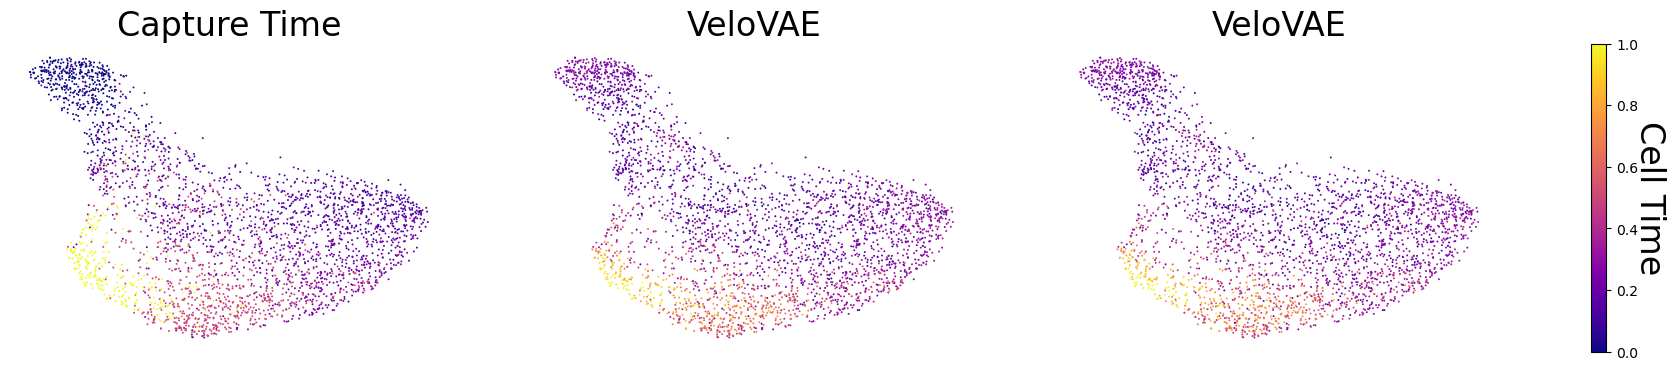

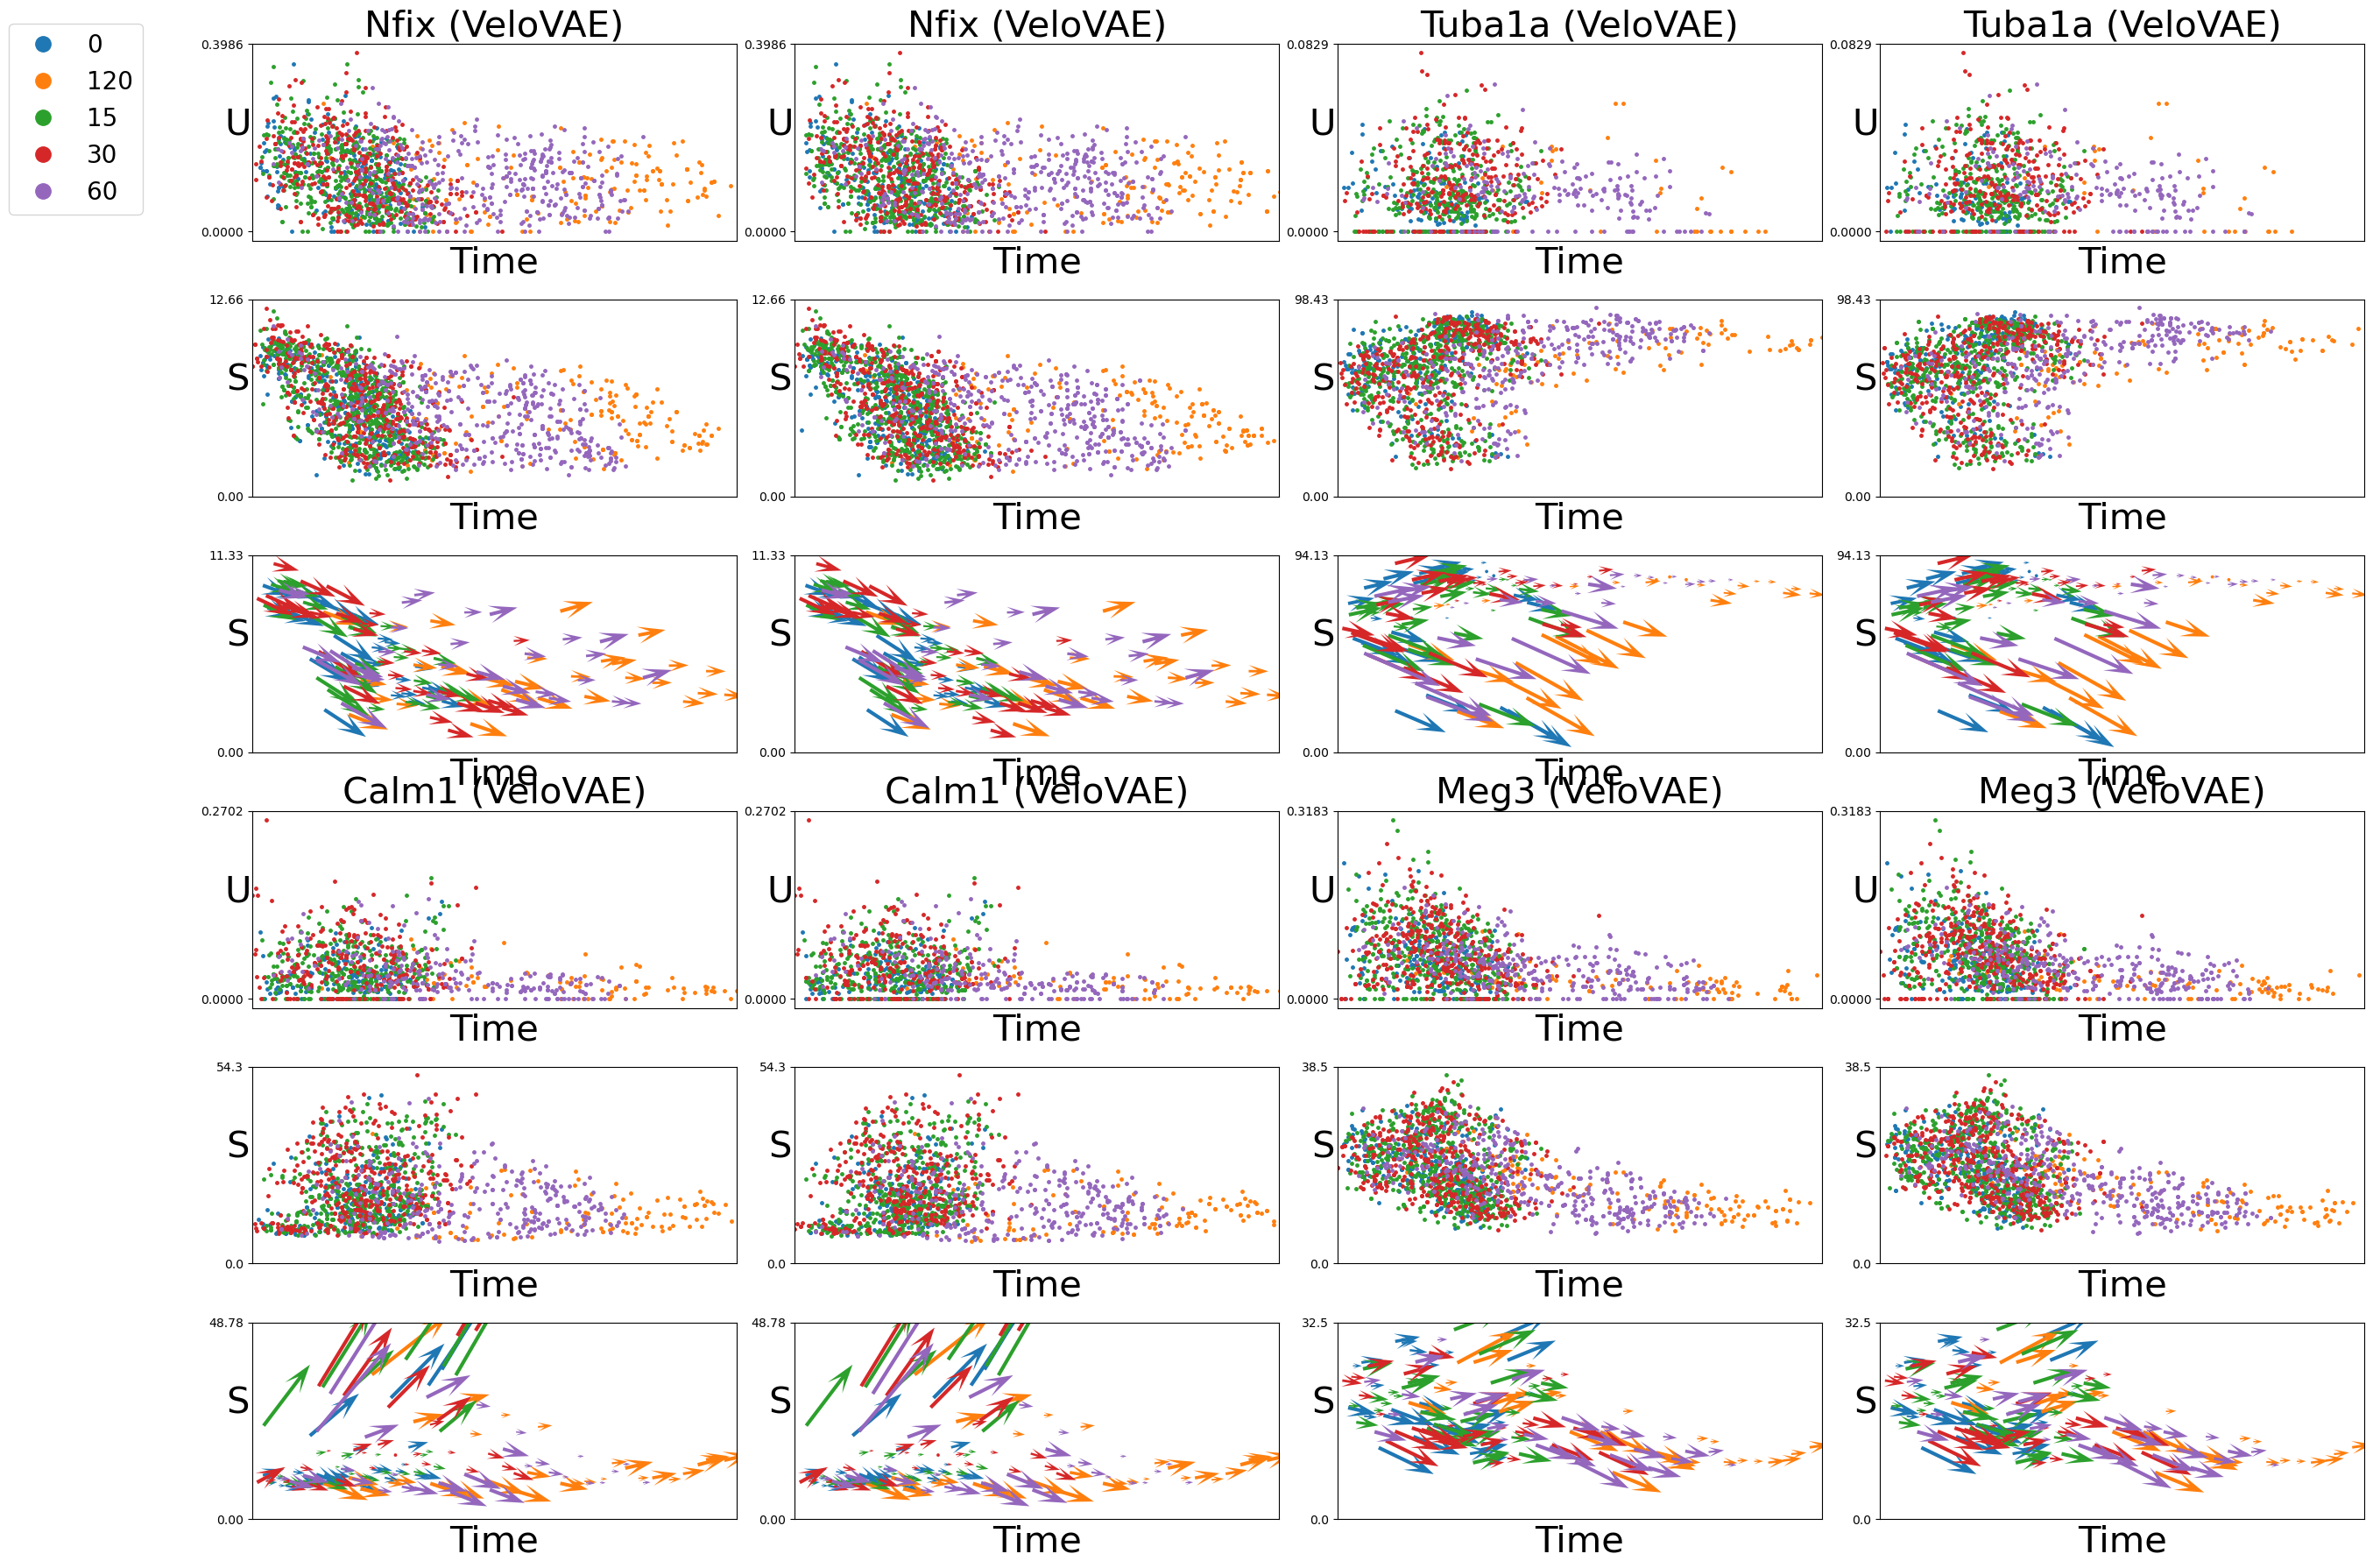

In [8]:
gidx = np.argsort(Ek)[-4:]
gene_plot = adata.var_names[gidx]
res, res_type = vv.post_analysis(adata,
                                 dataset,
                                 ['VeloVAE', 'FullVB'],
                                 ['velovae', 'fullvb'],
                                 compute_metrics=False,
                                 genes=gene_plot,
                                 plot_type=['time', 'gene'],
                                 grid_size=(2,2),
                                 figure_path=f'{root}/figures/{dataset}')

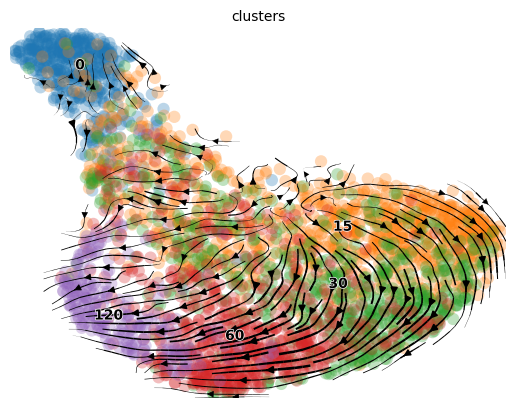

In [9]:
import scvelo as scv
scv.pl.velocity_embedding_stream(adata, vkey='fullvb_velocity')